In [1]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd

df = pd.read_csv("/Users/meyacarlos/Desktop/ITMGT25/Pandas exercise/fct_invoice.csv")

df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [12]:
#EASY

# 1. How many unique customers are in the dataset?

len(df["customer_id"].unique())

5191

In [8]:
# 2. What are the different categories of products available? How many unique categories are there?

print(df["category"].unique())

len(df["category"].unique())

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


8

In [10]:
# 3. Which payment method is the most popular? How many times was it used?

print(df["payment_method"].value_counts())

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64


In [16]:
#MEDIUM

# 1. What are the three most popular categories, by total sales?

df["total"] = df["quantity"] * df["price"]

df[["category", "total"]].head(3)

,category,total
0,Clothing,7502.00
1,Shoes,5401.53
2,Clothing,300.08


In [20]:
import json

json_df = pd.read_json("/Users/meyacarlos/Desktop/ITMGT25/Pandas exercise/dim_customer.json")
json_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [22]:
# 2. What are the total sales attributed to customers over the age of 45?

m_df = df[["total"]].copy()
m_df["id"] = df["customer_id"]

m_df = m_df.merge(json_df, how = "left")

filtered_df = m_df[m_df["age"] > 45]
over_45 = filtered_df["total"].sum()

# Summary of total sales for all customers over the age of 45
print(filtered_df.to_string(index=False))
print("")

# Scroll down for sum of all total sales
print(over_45)

   total    id  age  first_name gender   last_name
  300.08   644 46.0 Christopher      M    Stephens
15004.25  4900 46.0       Laura      F       Kelly
 7502.00   349 64.0       Cindy      F       Meyer
 1200.32  1575 67.0     Michael      M     Patrick
   15.15   195 48.0     Anthony      M       Cowan
 1200.32   731 55.0       Kevin      M       Marks
 1200.32   238 68.0       Stacy      F       Jones
15004.25  2184 58.0    Jennifer      F      Werner
  300.08  3047 78.0     Michael      M   Patterson
26250.00   279 60.0       James      M       Reyes
  378.75   592 74.0      Austin      M    Phillips
 5401.53  3875 61.0      Olivia      F      Powell
  365.94   111 49.0        Joel      M       Gomez
 5401.53   531 85.0   Christina      F        Wong
 4801.28  2681 54.0     Allison      F       Black
    5.23  3230 57.0       Tyler      M    Williams
 1200.32   739 48.0       Derek      M        Bell
 1200.32   958 76.0     Zachary      M      Strong
 9602.72   955 46.0    Courtney

In [25]:
import matplotlib.pyplot as plt
import numpy as np

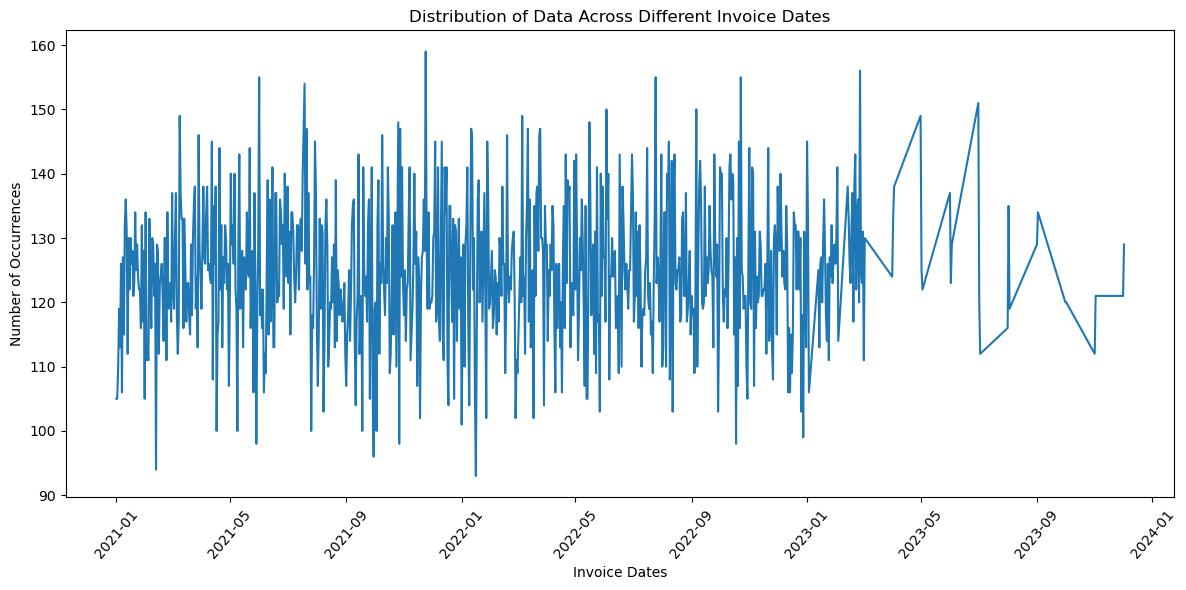

In [27]:
# 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

df["invoice_date"] = pd.to_datetime(df["invoice_date"])

# Group the data by invoice date and count the number of occurrences
daily_counts = df["invoice_date"].value_counts().sort_index()

# Plot the size
plt.figure(figsize=(12, 6))

# X-axis then Y-axis
plt.plot(daily_counts.index, daily_counts.values)
plt.xlabel("Invoice Dates")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of Data Across Different Invoice Dates")
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

In [28]:
#HARD

# 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

m_df = df[["total", "category"]].copy()
m_df["id"] = df["customer_id"]

m_df = m_df.merge(json_df, how = "left")

# Lower boundary of each decade 
decade_ranges = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Categorize the age into decade ranges wherein each decade is left-closed but right-open
m_df["decade_age_range"] = pd.cut(m_df["age"], bins=decade_ranges, right=False)

pivot_table = m_df.pivot_table(index="category", columns="decade_age_range", values="total")

print(pivot_table)

decade_age_range      [10, 20)      [20, 30)      [30, 40)      [40, 50)  \
category                                                                   
Books               170.690000    167.287895    165.962722    170.987059   
Clothing           3423.470409   3235.711111   3350.288274   3291.808019   
Cosmetics           466.465362    447.169978    442.264487    447.232656   
Food & Beverage      60.365822     54.763010     57.932842     57.149515   
Shoes              6492.034967   6568.601153   7045.831370   6801.152004   
Souvenir            137.501667    121.287682    128.700241    134.124848   
Technology        13291.764706  11488.100437  11665.340909  11363.645038   
Toys                364.013494    416.775758    390.875836    390.906880   

decade_age_range      [50, 60)      [60, 70)      [70, 80)      [80, 90)  
category                                                                  
Books               162.255844    172.696996    156.204701    153.241379  
Clothing      